In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl


In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def gen_data(n=1000,mu=np.array([2]*10).reshape(-1,1)):
    X=np.random.normal(size=(n, len(mu)), loc=0, scale=1)
    return X, (sigmoid(X @ mu)>0.5).astype(np.int32)

In [18]:
X_train,y_train=gen_data()
X_test,y_test=gen_data()

In [93]:
class GDLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.param_matrix=None


    def _risk(self, X, y,it=None):
        if it is not None:
            weights = self.param_matrix[:, it].reshape(-1, 1)
        else:
            weights = self.weights
        linear_model = X @ weights
        y_predicted = sigmoid(linear_model)
        risk=0
        risk-=2*np.mean(y*np.log(y_predicted))
        risk-=np.mean((1-y)*np.log(1-y_predicted))
        risk+=0.01*np.sum(weights**2)
        return risk
    def _gradient(self, X, y):
        linear_model = X @ self.weights
        y_predicted = sigmoid(linear_model)
        gradient = np.zeros_like(self.weights).reshape(-1,1)
        gradient-=2*np.mean(X*(1-y_predicted)*y, axis=0).reshape(-1,1)
        gradient-=np.mean(X*y_predicted*y, axis=0).reshape(-1,1)
        gradient+=0.02*self.weights
        return gradient
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features).reshape(-1,1)
        self.param_matrix = np.zeros((n_features, self.max_iter+1))
        self.param_matrix[:, 0] = self.weights.reshape(-1)
        risks=[]
        risks.append(self._risk(X, y))
        for _ in range(self.max_iter):
            gradient = self._gradient(X, y)
            self.weights -= self.learning_rate * gradient
            self.param_matrix[:, _ + 1] = self.weights.reshape(-1)
            current_risk= self._risk(X, y)
            risks.append(current_risk)
        plt.plot(risks)
            
            
            
            

    def predict(self, X,it=None):
        
        if it is not None:
            weights = self.param_matrix[:, it].reshape(-1, 1)
        else:
            weights= self.weights
        linear_model = X @ weights
        y_predicted = sigmoid(linear_model)
        return (y_predicted > 0.5).astype(int)
    def get_params(self):
        return self.weights, self.param_matrix

In [94]:
model = GDLogisticRegression(learning_rate=0.01, max_iter=1000)

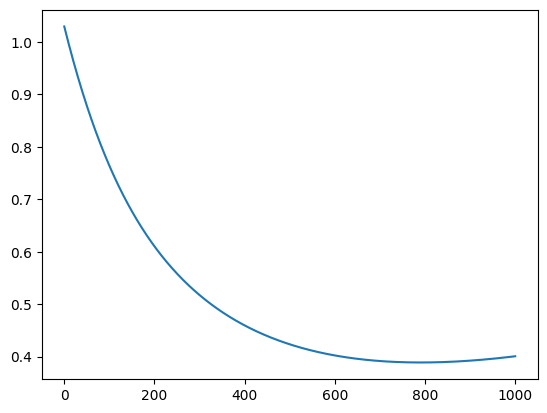

In [95]:
model.fit(X_train,y_train)

In [96]:
w,par=model.get_params()

In [97]:
def plot_risk(model, X, y):
    risks = []
    for i in range(model.max_iter+1):
        curr_r= model._risk(X, y, it=i)
        risks.append(curr_r)
        print(f"Iteration {i}, Risk: {curr_r}")
    plt.plot(risks)
    plt.xlabel('Iteration')
    plt.ylabel('Risk')
    plt.title('Risk vs Iteration')
    plt.show()

Iteration 0, Risk: 1.0293235631315187
Iteration 1, Risk: 1.0258799491144244
Iteration 2, Risk: 1.0224547684806737
Iteration 3, Risk: 1.0190479542905502
Iteration 4, Risk: 1.0156594389488545
Iteration 5, Risk: 1.0122891542208166
Iteration 6, Risk: 1.0089370312481083
Iteration 7, Risk: 1.0056030005649432
Iteration 8, Risk: 1.0022869921142574
Iteration 9, Risk: 0.998988935263955
Iteration 10, Risk: 0.9957087588232127
Iteration 11, Risk: 0.9924463910588288
Iteration 12, Risk: 0.9892017597116087
Iteration 13, Risk: 0.9859747920127747
Iteration 14, Risk: 0.9827654147003912
Iteration 15, Risk: 0.9795735540357935
Iteration 16, Risk: 0.9763991358200121
Iteration 17, Risk: 0.9732420854101818
Iteration 18, Risk: 0.970102327735922
Iteration 19, Risk: 0.9669797873156875
Iteration 20, Risk: 0.9638743882730709
Iteration 21, Risk: 0.9607860543530524
Iteration 22, Risk: 0.9577147089381888
Iteration 23, Risk: 0.9546602750647277
Iteration 24, Risk: 0.951622675438646
Iteration 25, Risk: 0.948601832451595


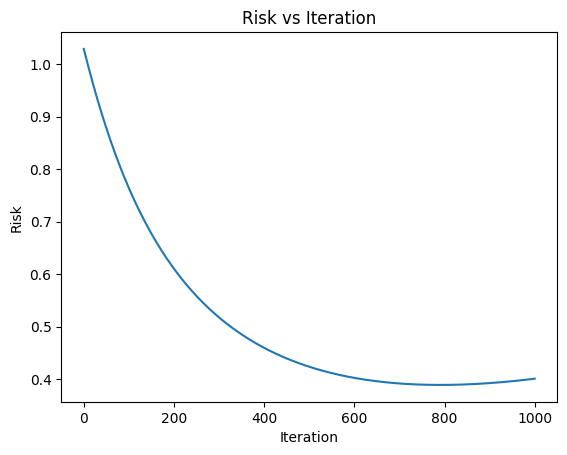

In [98]:
plot_risk(model, X_train, y_train)

In [99]:
def plot_acc(model, X, y):
    accuracies = []
    for i in range(model.max_iter+1):
        y_pred = model.predict(X, it=i)
        acc = np.mean(y_pred == y)
        accuracies.append(acc)
        print(f"Iteration {i}, Accuracy: {acc}")
    plt.plot(accuracies)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iteration')
    plt.show()

Iteration 0, Accuracy: 0.515
Iteration 1, Accuracy: 0.956
Iteration 2, Accuracy: 0.956
Iteration 3, Accuracy: 0.956
Iteration 4, Accuracy: 0.956
Iteration 5, Accuracy: 0.956
Iteration 6, Accuracy: 0.956
Iteration 7, Accuracy: 0.956
Iteration 8, Accuracy: 0.956
Iteration 9, Accuracy: 0.956
Iteration 10, Accuracy: 0.956
Iteration 11, Accuracy: 0.956
Iteration 12, Accuracy: 0.956
Iteration 13, Accuracy: 0.956
Iteration 14, Accuracy: 0.956
Iteration 15, Accuracy: 0.956
Iteration 16, Accuracy: 0.956
Iteration 17, Accuracy: 0.956
Iteration 18, Accuracy: 0.956
Iteration 19, Accuracy: 0.956
Iteration 20, Accuracy: 0.956
Iteration 21, Accuracy: 0.956
Iteration 22, Accuracy: 0.956
Iteration 23, Accuracy: 0.956
Iteration 24, Accuracy: 0.956
Iteration 25, Accuracy: 0.956
Iteration 26, Accuracy: 0.956
Iteration 27, Accuracy: 0.956
Iteration 28, Accuracy: 0.956
Iteration 29, Accuracy: 0.956
Iteration 30, Accuracy: 0.956
Iteration 31, Accuracy: 0.956
Iteration 32, Accuracy: 0.956
Iteration 33, Accura

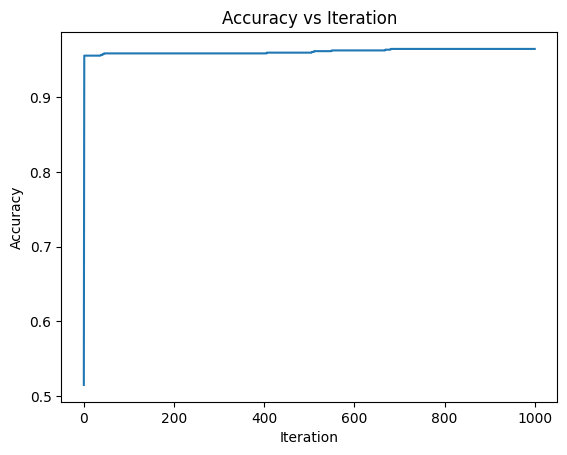

In [100]:
plot_acc(model, X_train, y_train)

Iteration 0, Accuracy: 0.491
Iteration 1, Accuracy: 0.954
Iteration 2, Accuracy: 0.954
Iteration 3, Accuracy: 0.954
Iteration 4, Accuracy: 0.954
Iteration 5, Accuracy: 0.954
Iteration 6, Accuracy: 0.954
Iteration 7, Accuracy: 0.954
Iteration 8, Accuracy: 0.954
Iteration 9, Accuracy: 0.954
Iteration 10, Accuracy: 0.954
Iteration 11, Accuracy: 0.954
Iteration 12, Accuracy: 0.954
Iteration 13, Accuracy: 0.954
Iteration 14, Accuracy: 0.954
Iteration 15, Accuracy: 0.954
Iteration 16, Accuracy: 0.954
Iteration 17, Accuracy: 0.954
Iteration 18, Accuracy: 0.954
Iteration 19, Accuracy: 0.954
Iteration 20, Accuracy: 0.955
Iteration 21, Accuracy: 0.955
Iteration 22, Accuracy: 0.955
Iteration 23, Accuracy: 0.955
Iteration 24, Accuracy: 0.955
Iteration 25, Accuracy: 0.955
Iteration 26, Accuracy: 0.955
Iteration 27, Accuracy: 0.955
Iteration 28, Accuracy: 0.955
Iteration 29, Accuracy: 0.955
Iteration 30, Accuracy: 0.955
Iteration 31, Accuracy: 0.955
Iteration 32, Accuracy: 0.955
Iteration 33, Accura

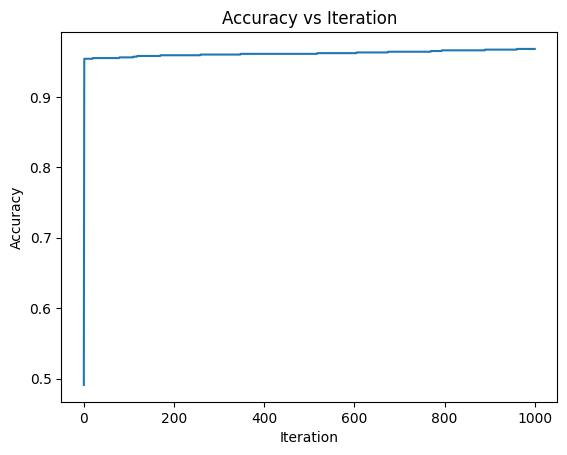

In [101]:
plot_acc(model, X_test, y_test)

In [118]:
from scipy import stats
def F(x):
        return 0.25 * stats.norm.pdf(x, -5, .5) + 0.25 * stats.norm.pdf(x, 0, 0.5) + 0.5 * stats.norm.pdf(x, 5, 0.5)

In [123]:
def gen_data(n=1000):
    
    X = np.random.uniform(-10, 10, n)
    eps=np.random.normal(0,0.2,n)
    print(eps.shape)
    y= F(X) + eps
    return X,y 

In [125]:
X,y=gen_data()

(1000,)


In [128]:
from scipy.interpolate import make_smoothing_spline
def fit_spline(X, y):
    spline = make_smoothing_spline(X, y)
    return spline

In [129]:
fit_spline(X,y)

ValueError: ``x`` should be an ascending array

In [7]:
def gen_data_3(n=1000):
    X1=0.25*np.random.normal(-1,0.2, n)+0.25*np.random.normal(1,0.2, n)+.5*np.random.normal(5,0.2, n)
    X2=np.random.normal(0,1,n)
    X= np.column_stack((X1, X2))
    y= np.zeros(n)
    for i in range(n):
        tmp= np.random.uniform(0, 1)
        if X1[i] < 3:
            y[i] = 1 if tmp>0.9 else 0
        elif X1[i] > 3:
            y[i] = 1 if tmp>0.1 else 0
        
    return X ,y

In [17]:
X,y=gen_data_3()

In [18]:

np.unique(y, return_counts=True)

(array([0., 1.]), array([912,  88]))

In [20]:
from sklearn.neighbors import KernelDensity
def fit_kde(X, bandwidth=0.2):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    return kde

In [44]:
def estim_info(i=0):
    X, y = gen_data_3()
    X_i= X[:, i].reshape(-1, 1)
    y_1=np.argwhere(y==1).flatten()
    y_0=np.argwhere(y==0).flatten()
    f= fit_kde(X_i)
    f_1= fit_kde(X_i[y_1])
    f_2= fit_kde(X_i[y_0])
    log_x=f.score_samples(X_i)
    log_x_1=f_1.score_samples(X_i[y_1])
    log_x_2=f_2.score_samples(X_i[y_0])
    info=-np.dot(np.exp(log_x), log_x)+np.dot(np.exp(log_x_1), log_x_1)+np.dot(np.exp(log_x_2), log_x_2)
    return info    
    
    

In [55]:
estim_info(0)

np.float64(0.08756813400373176)

In [56]:
estim_info(1)

np.float64(-0.24944172917025753)

array([1.65115758, 1.42843919, 1.62202354, 1.56973101, 1.69017653,
       1.69537349, 1.39686738, 0.92018013, 1.64861603, 1.57468503,
       1.3231741 , 1.52682029, 1.61179874, 1.69618796, 1.56348371,
       1.63272994, 1.69987943, 1.53745952, 1.60493445, 1.56785545,
       1.09313214, 1.58159141, 1.69999621, 1.69725879, 1.69542195,
       1.40561704, 1.67926027, 1.68888859, 1.53558636, 1.64273594,
       1.68183721, 1.70025911, 1.68894559, 1.57623653, 1.41891043,
       1.35600377, 1.69766716, 1.69313592, 1.12380709, 1.69282079,
       1.47581665, 1.69044304, 1.53729844, 1.44947288, 1.08954181,
       1.68702414, 1.6425923 , 1.69791706, 1.59923831, 1.49851689,
       0.93931041, 1.302422  , 1.1773502 , 1.14690751, 1.69326716,
       1.34972842, 1.6142325 , 1.47133877, 1.69913064, 1.68942087,
       1.23560028, 0.99884236, 1.58693872, 1.19545711, 1.57068069,
       1.62464694, 1.65550072, 1.65181704, 1.69629001, 1.68485662,
       1.69620977, 1.3870917 , 1.48101799, 1.68635521, 1.69916

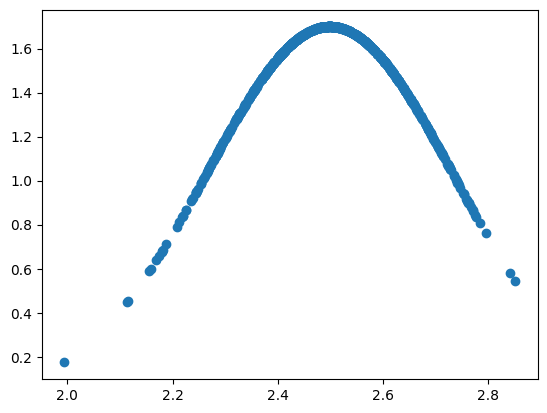